# Xây dựng mô hình dự báo trọng lượng của cá


# Bước 1: Import thư viện

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import math 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from scipy import stats
import seaborn as sns 

# Bước 2: Tải dữ liệu

In [2]:
#Load dữ liệu 
path =r"C:\Users\admin\Fish.csv"
fish_data = pd.read_csv(path)
fish_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [3]:
#Thay đổi tên cột
fish_data.columns = ['species', 'weight','vertical_length','diagnol_length','cross_length','height','width']

In [4]:
# print the first five rows
fish_data.head()

,species,weight,vertical_length,diagnol_length,cross_length,height,width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


# Bước 3: Kiểm tra dữ liệu

In [5]:
# kiểm tra kiểu dữ liệu.
fish_data.dtypes

species             object
weight             float64
vertical_length    float64
diagnol_length     float64
cross_length       float64
height             float64
width              float64
dtype: object

In [6]:
print(fish_data.keys())
print(fish_data.shape)

Index(['species', 'weight', 'vertical_length', 'diagnol_length',
       'cross_length', 'height', 'width'],
      dtype='object')
(159, 7)


In [7]:
# Thiết lập tên mới
new_column_names = {'species':'Loại cá'}
# Đổi tên cột
fish_data = fish_data.rename(columns = new_column_names)
fish_data.head(100)

,Loại cá,weight,vertical_length,diagnol_length,cross_length,height,width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
95,Perch,170.0,21.5,23.5,25.0,6.2750,3.7250
96,Perch,225.0,22.0,24.0,25.5,7.2930,3.7230
97,Perch,145.0,22.0,24.0,25.5,6.3750,3.8250
98,Perch,188.0,22.6,24.6,26.2,6.7334,4.1658


In [8]:
# kiểm tra giá trị bị thiếu
display(fish_data.isna().any())
# xóa giá trị bị thiếu
fish_data = fish_data.dropna()
# Kiểm tra lại dữ liệu
fish_data.isna().any()

Loại cá            False
weight             False
vertical_length    False
diagnol_length     False
cross_length       False
height             False
width              False
dtype: bool

Loại cá            False
weight             False
vertical_length    False
diagnol_length     False
cross_length       False
height             False
width              False
dtype: bool

# Bước 4: Tìm hiểu về dữ liệu

In [9]:
X = fish_data.drop(['weight','Loại cá'], axis=1).values
Y = fish_data['weight'].values

In [10]:
print(X)

[[23.2    25.4    30.     11.52    4.02  ]
 [24.     26.3    31.2    12.48    4.3056]
 [23.9    26.5    31.1    12.3778  4.6961]
 [26.3    29.     33.5    12.73    4.4555]
 [26.5    29.     34.     12.444   5.134 ]
 [26.8    29.7    34.7    13.6024  4.9274]
 [26.8    29.7    34.5    14.1795  5.2785]
 [27.6    30.     35.     12.67    4.69  ]
 [27.6    30.     35.1    14.0049  4.8438]
 [28.5    30.7    36.2    14.2266  4.9594]
 [28.4    31.     36.2    14.2628  5.1042]
 [28.7    31.     36.2    14.3714  4.8146]
 [29.1    31.5    36.4    13.7592  4.368 ]
 [29.5    32.     37.3    13.9129  5.0728]
 [29.4    32.     37.2    14.9544  5.1708]
 [29.4    32.     37.2    15.438   5.58  ]
 [30.4    33.     38.3    14.8604  5.2854]
 [30.4    33.     38.5    14.938   5.1975]
 [30.9    33.5    38.6    15.633   5.1338]
 [31.     33.5    38.7    14.4738  5.7276]
 [31.3    34.     39.5    15.1285  5.5695]
 [31.4    34.     39.2    15.9936  5.3704]
 [31.5    34.5    39.7    15.5227  5.2801]
 [31.8    3

In [11]:
print(Y)

[ 242.   290.   340.   363.   430.   450.   500.   390.   450.   500.
  475.   500.   500.   340.   600.   600.   700.   700.   610.   650.
  575.   685.   620.   680.   700.   725.   720.   714.   850.  1000.
  920.   955.   925.   975.   950.    40.    69.    78.    87.   120.
    0.   110.   120.   150.   145.   160.   140.   160.   169.   161.
  200.   180.   290.   272.   390.   270.   270.   306.   540.   800.
 1000.    55.    60.    90.   120.   150.   140.   170.   145.   200.
  273.   300.     5.9   32.    40.    51.5   70.   100.    78.    80.
   85.    85.   110.   115.   125.   130.   120.   120.   130.   135.
  110.   130.   150.   145.   150.   170.   225.   145.   188.   180.
  197.   218.   300.   260.   265.   250.   250.   300.   320.   514.
  556.   840.   685.   700.   700.   690.   900.   650.   820.   850.
  900.  1015.   820.  1100.  1000.  1100.  1000.  1000.   200.   300.
  300.   300.   430.   345.   456.   510.   540.   500.   567.   770.
  950.  1250.  1600.

In [12]:
# Đo lường tương quan
fish_data.corr()

,weight,vertical_length,diagnol_length,cross_length,height,width
weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
vertical_length,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
diagnol_length,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
cross_length,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


In [13]:
#Xuất ra bảng tóm tắt thống kê với hàm .describe()
fish_data.describe()

,weight,vertical_length,diagnol_length,cross_length,height,width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


array([[<AxesSubplot:title={'center':'weight'}>,
        <AxesSubplot:title={'center':'vertical_length'}>],
       [<AxesSubplot:title={'center':'diagnol_length'}>,
        <AxesSubplot:title={'center':'cross_length'}>],
       [<AxesSubplot:title={'center':'height'}>,
        <AxesSubplot:title={'center':'width'}>]], dtype=object)

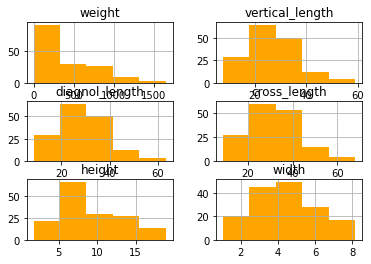

In [14]:
fish_data.hist(grid = True,bins = 5, color = 'orange')
#sử dụng hàm .hist để vẽ histogram (biểu đồ) thể hiện tần suất của dữ liệu

Loại cá

In [15]:
# Đếm loại cá mà chúng ta có trong dữ liệu
print(fish_data.groupby('Loại cá').size())

Loại cá
Bream        35
Parkki       11
Perch        56
Pike         17
Roach        20
Smelt        14
Whitefish     6
dtype: int64


c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


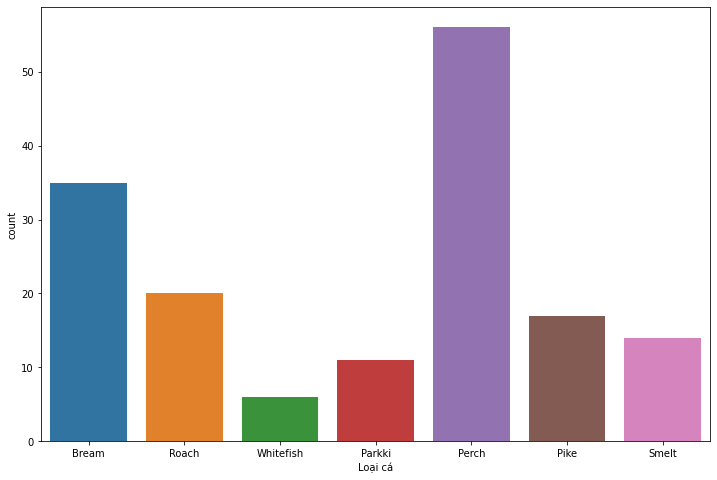

In [16]:
#Tần suất loại cá
plt.figure(figsize=(12,8))
sns.countplot(fish_data['Loại cá'])
plt.show()

# Bước 5: Xây dựng mô hình

In [17]:
# Tách dữ liệu để train-test
X_train, X_test, Y_train, Y_test =  train_test_split( X,Y,test_size=0.3, random_state=10)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(111, 5)
(48, 5)
(111,)
(48,)


In [18]:
# tạo một đối tượng mô hình Hồi quy tuyến tính.
regression_model = LinearRegression()
# chuyển qua tập dữ liệu X_train & y_train.
regression_model.fit(X_train, Y_train)

LinearRegression()

In [19]:
print("Intercept cho mô hình là: {:.4}".format(regression_model.intercept_))

Intercept cho mô hình là: -520.1


In [20]:
print(regression_model.coef_)

[ 40.93617308  10.06005782 -23.01662758  24.72253785  14.4039206 ]


In [21]:
#Đưa ra nhiều dự đoán trên tập test
Y_predict_test = regression_model.predict(X_test)

# Hiển thị ra 10 dự đoán đầu tiên
Y_predict_test[:10]

array([-87.84321884, 168.20569933, 207.55330308, 687.70771533,
       450.59823258, 229.81721886, 418.22868451, 547.28559303,
       536.02016027, 367.92959207])

In [22]:
#Đưa ra nhiều dự đoán trên tập train
Y_predict_train = regression_model.predict(X_train)

# Hiển thị ra 10 dự đoán đầu tiên
Y_predict_train[:10]

array([699.71487794, 108.36323164, 190.47343982, 140.74390037,
       173.1331627 , 877.38738143,   3.45042974,  82.76013741,
       237.40162985, 376.97562926])

Đồ thị biểu diễn giá trị thực tế và giá trị dự doán của Y_test và Y_predict_test.

Text(0.5, 1.0, 'Expected vs. Predicted')

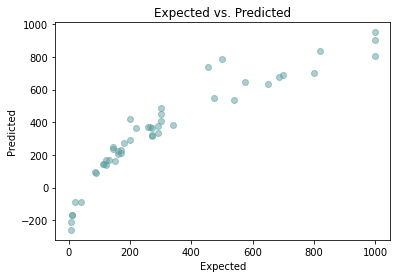

In [23]:
plt.scatter(Y_test, Y_predict_test, color ='cadetblue' ,alpha=0.5)
plt.xlabel("Expected")
plt.ylabel("Predicted")
plt.title("Expected vs. Predicted")


Đồ thị biểu diễn giữa giá trị thực tế và giá trị dự đoán của Y_train  và Y_predict_train

Text(0.5, 1.0, 'Expected vs. Predicted')

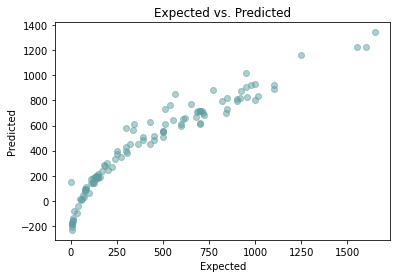

In [24]:
plt.scatter(Y_train, Y_predict_train, color ='cadetblue' ,alpha=0.5)
plt.xlabel("Expected")
plt.ylabel("Predicted")
plt.title("Expected vs. Predicted")

# Bước 6: Đánh giá mô hình

In [25]:
# xác định đầu vào
X2 = sm.add_constant(X)

#Tạo một mô hình OLS 
model = sm.OLS(Y, X2)

# fit the data
est = model.fit()

In [26]:
#tạo một số khoảng tin cậy, theo mặc định là 95%. 
est.conf_int()

array([[-558.00958578, -441.16432494],
       [ -17.08078028,  141.79120915],
       [ -89.02495596,   75.97145098],
       [ -63.30855369,    5.25611646],
       [  11.05197654,   45.54272611],
       [ -17.77289147,   62.71950478]])

In [27]:
#ước lượng giá trị
est.pvalues

array([8.44136168e-37, 1.23018636e-01, 8.76005273e-01, 9.64307949e-02,
       1.45847750e-03, 2.71689248e-01])

Đánh giá trên Y_test và Y_predict_test

In [28]:
# calculate the mean absolute error.
model_mae_test = mean_absolute_error(Y_test, Y_predict_test)

# calculate the mean squared error
model_mse_test = mean_squared_error(Y_test, Y_predict_test)

# calulcate the root mean squared error
model_rmse_test =  math.sqrt(model_mse_test)


# The mean squared error
print('Mean squared error: ' + '\033[1m' + '{:.4}''\033[0m'.format(model_mse_test))

# The mean squared error
print('Root Mean squared error: ' + '\033[1m' + '{:.4}''\033[0m'.format(math.sqrt(model_mse_test)))


# Explained variance score: 1 is perfect prediction
print('R2 score: '+ '\033[1m' + '{:.2}''\033[0m'.format(r2_score(Y_test,Y_predict_test)))

Mean squared error: 1.421e+04
Root Mean squared error: 119.2
R2 score: 0.81


Đánh giá trên Y_train và Y_predict_train

In [29]:
# calculate the mean absolute error.
model_mae_train = mean_absolute_error(Y_train, Y_predict_train)

# calculate the mean squared error
model_mse_train = mean_squared_error(Y_train, Y_predict_train)

# calulcate the root mean squared error
model_rmse_train =  math.sqrt(model_mse_train)

# The mean squared error
print('Mean squared error: ' + '\033[1m' + '{:.4}''\033[0m'.format(model_mse_train))

# The mean squared error
print('Root Mean squared error: ' + '\033[1m' + '{:.4}''\033[0m'.format(math.sqrt(model_mse_train)))


# Explained variance score: 1 is perfect prediction
print('R2 score: '+ '\033[1m' + '{:.2}''\033[0m'.format(r2_score(Y_train,Y_predict_train)))

Mean squared error: 1.526e+04
Root Mean squared error: 123.5
R2 score: 0.9


In [30]:
#In ra bản tóm tắt
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     236.2
Date:                Tue, 23 Nov 2021   Prob (F-statistic):           4.95e-70
Time:                        20:03:45   Log-Likelihood:                -987.96
No. Observations:                 159   AIC:                             1988.
Df Residuals:                     153   BIC:                             2006.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -499.5870     29.572    -16.894      0.0